Training a LSTM model with ULMFIT approach on original text and then on reversed text. This is sort of  student model which is being trained on the predictions of a nother similar model. These predictions serve as the pseudo labels.

Inpiration source [here](https://www.kaggle.com/gurharkhalsa/backwards-forwards-ulmfit-ensemble).

In [1]:
#!pip install --no-index --find-links="../input/commonlit-pkgs-offline-download" spacy==3.1.1
!pip install spacy==3.1.1

     |████████████████████████████████| 6.4 MB 3.6 MB/s 
     |████████████████████████████████| 42 kB 966 kB/s 
     |████████████████████████████████| 456 kB 8.5 MB/s 
     |████████████████████████████████| 621 kB 7.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting uninstall: spacy
    Found existing installation: spacy 2.3.7
    Uninstalling spacy-2.3.7:
      Successfully uninstalled spacy-2.3.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency c

In [2]:
#!pip install --no-index --find-links="../input/commonlit-pkgs-offline-download" fastai==2.4.1
!yes Y|conda install -c fastai fastai=2.4.1

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

## Import libraries

In [3]:
from typing import *
from pandas.core.frame import DataFrame
from fastai.text.all import *

In [4]:
def drop_cols(df: DataFrame, cols: List) -> DataFrame:
    """drop the given list of columns from the dataframe"""
    return df.drop(cols, axis=1)

def concat_dfs(dfs: List) -> DataFrame:
    """concatenate two dataframes"""
    return pd.concat(dfs)

In [5]:
path = Path('../input')
op_path = Path('/kaggle/working')
test_path = path/'commonlitreadabilityprize/test.csv'
inf_label_path = path/'commonlit-inf-ensmble-fwd-bkwd-student/submission.csv'
cbt_aug_pseudo_label = path/'commonlit-pseudo-labeler/pseudo_labels.csv'

In [6]:
df_test = pd.read_csv(test_path)
df_subm = pd.read_csv(inf_label_path)
df_cbt_aug_pseudo_label = pd.read_csv(cbt_aug_pseudo_label)

In [7]:
df_cbt_aug_pseudo_label.head(1)

,excerpt,target
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259


In [8]:
df_test.head(1)

,id,url_legal,license,excerpt
0,c0f722661,NaN,NaN,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."


In [9]:
df_test = drop_cols(df_test, ['id', 'url_legal',
                             'license'])
df_test.head(1)

,excerpt
0,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai..."


In [10]:
inf_targets = df_subm.target.to_list()

In [11]:
df_test['target'] = inf_targets
df_test.head(1)

,excerpt,target
0,"My hope lay in Jack's promise that he would keep a bright light burning in the upper story to guide me on my course. On a clear night this light was visible from the village, but somehow or other I failed to take into account the state of the weather. The air was full of eddying flakes, which would render the headlight of a locomotive invisible a hundred yards distant. Strange that this important fact never occurred to me until I was fully a fourth of a mile from the village. Then, after looking in vain for the beacon light, the danger of my situation struck me, and I halted.\n""I am certai...",-1.354704


In [12]:
df_cbt_aug_pseudo_label = concat_dfs([df_cbt_aug_pseudo_label,df_test])
df_cbt_aug_pseudo_label.head(1)

,excerpt,target
0,"When the young people returned to the ballroom, it presented a decidedly changed appearance. Instead of an interior scene, it was a winter landscape.\nThe floor was covered with snow-white canvas, not laid on smoothly, but rumpled over bumps and hillocks, like a real snow field. The numerous palms and evergreens that had decorated the room, were powdered with flour and strewn with tufts of cotton, like snow. Also diamond dust had been lightly sprinkled on them, and glittering crystal icicles hung from the branches.\nAt each end of the room, on the wall, hung a beautiful bear-skin rug.\nThe...",-0.340259


## Create the forward model 

## The dataloader

In [13]:
dls_lm_forward = TextDataLoaders.from_df(df_cbt_aug_pseudo_label, text_col='excerpt',
                                      is_lm=True, valid_pct=0.1,
                                      bs=128, seq_len=72, backwards=False)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
dls_lm_forward.show_batch(min_n=3)

,text,text_
0,"xxbos ` ` xxmaj for , '' he said , ` ` however flourishing we may seem to foreigners , we are in danger of an invasion from the island of xxmaj blefuscu , which is the other great empire of the universe , almost as large and as powerful as this of his xxmaj majesty .for as to what we have heard you say , that there are other kingdoms in","` ` xxmaj for , '' he said , ` ` however flourishing we may seem to foreigners , we are in danger of an invasion from the island of xxmaj blefuscu , which is the other great empire of the universe , almost as large and as powerful as this of his xxmaj majesty .for as to what we have heard you say , that there are other kingdoms in the"
1,"not notice the escape of the princess . ' a few minutes later they arrived at the castle , and the fox , who had often been there before , slipped in without difficulty .there were several giants , both young and old , in the hall , and they were all dancing round the princess .as soon as they saw the fox they cried out : ` xxmaj come and dance","notice the escape of the princess . ' a few minutes later they arrived at the castle , and the fox , who had often been there before , slipped in without difficulty .there were several giants , both young and old , in the hall , and they were all dancing round the princess .as soon as they saw the fox they cried out : ` xxmaj come and dance too"
2,-- lsb- xxmaj footnote 4 : xxmaj world - gripper . -rsb -- lsb- xxmaj footnote 5 : xxmaj love - enkindler . -rsb -- lsb- xxmaj footnote 6 : xxmaj rose - cheek . -rsb -- lsb- xxmaj footnote 7 : xxmaj heartsease . -rsb -- lsb- xxmaj footnote 8 : xxmaj elias . -rsb -- lsb- xxmaj footnote 9 : xxmaj pleasure . -rsb -- lsb- xxmaj footnote 10 :,lsb- xxmaj footnote 4 : xxmaj world - gripper . -rsb -- lsb- xxmaj footnote 5 : xxmaj love - enkindler . -rsb -- lsb- xxmaj footnote 6 : xxmaj rose - cheek . -rsb -- lsb- xxmaj footnote 7 : xxmaj heartsease . -rsb -- lsb- xxmaj footnote 8 : xxmaj elias . -rsb -- lsb- xxmaj footnote 9 : xxmaj pleasure . -rsb -- lsb- xxmaj footnote 10 : xxmaj
3,"not do that , '' said the bailiff ; ` ` i am the one to do that . '' and , big and fat as he was , he went out as briskly as a boy . ` ` xxmaj tell me when you have got hold of the calf 's tail , '' said the xxmaj master - maid . ` ` i have hold of it now , ''","do that , '' said the bailiff ; ` ` i am the one to do that . '' and , big and fat as he was , he went out as briskly as a boy . ` ` xxmaj tell me when you have got hold of the calf 's tail , '' said the xxmaj master - maid . ` ` i have hold of it now , '' cried"
4,"'' they asked .and then the king told them about xxmaj jaqueline and the xxmaj earthquaker , and how he needed a great weight of xxmaj stupidity to flatten him out with .the ladies heard him in silence , and then they said : ` ` xxmaj follow us , '' and they flew lightly beside the xxmaj flying xxmaj horse till they had crossed all the bright side of the moon","they asked .and then the king told them about xxmaj jaqueline and the xxmaj earthquaker , and how he needed a great weight of xxmaj stupidity to flatten him out with .the ladies heard him in silence , and then they said : ` ` xxmaj follow us , '' and they flew lightly beside the xxmaj flying xxmaj horse till they had crossed all the bright side of the moon ,"
5,"very thick there ; so that the yard looked yellow , instead of green . \n xxmaj one bright morning xxmaj willy 's mamma put on his straw hat , and sent him out in the yard to play . xxmaj she knew the yard had a high fence ; and he could not open the gate ; so he was safe . \n xxmaj when it was time for him to","thick there ; so that the yard looked yellow , instead of green . \n xxmaj one bright morning xxmaj willy 's mamma put on his straw hat , and sent him out in the yard to play . xxmaj she knew the yard had a high fence ; and he could not open the gate ; so he was safe . \n xxmaj when it was time for him to have"
6,"his nose and put spurs to his

## The forward Language model

In [15]:
learn_forward = language_model_learner(dls_lm_forward,
                               AWD_LSTM,
                               drop_mult=2.0,
                               metrics=[accuracy, Perplexity()], 
                               path=path,
                              wd=0.5).to_fp16()

In [16]:
learn_forward.path = op_path

In [17]:
learn_forward.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.468009,3.885311,0.285226,48.682098,05:15


In [18]:
def show_me_lrs(learn):
    suggestions = namedtuple('Suggestions', ["min", "steep",
                                            "valley", "slide"])
    lr_min, lr_steep,lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep,valley, slide))
    suggested_lrs = suggestions(lr_min, lr_steep, lr_valley, lr_slide)
    
    print(f"Minimum/10:\t{lr_min:.2e}\
          \nSteepest point:\t{lr_steep:.2e}\
          \nLongest valley:\t{lr_valley:.2e}\
          \nSlide interval:\t{lr_slide:.2e}")
    
    return suggested_lrs

/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


Minimum/10:	6.31e-06          
Steepest point:	6.92e-06          
Longest valley:	1.00e-05          
Slide interval:	6.31e-03


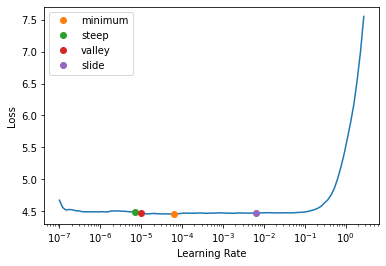

In [19]:
suggested_lrs = show_me_lrs(learn_forward)

In [20]:
learn_forward.unfreeze()
learn_forward.fit_one_cycle(3, suggested_lrs.slide)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.678681,3.247253,0.359934,25.719603,05:50
1,3.290962,2.740915,0.446893,15.501163,05:51
2,2.896492,2.419196,0.515842,11.236820,05:48


In [21]:
learn_forward.path = Path(".")
learn_forward.save_encoder('./forward_final_encoder')

## Forward Text Regressor

In [22]:
data = DataBlock(
       blocks=(TextBlock.from_df('excerpt', 
                                 vocab=dls_lm_forward.vocab, seq_len=72,
                                 backwards=False), RegressionBlock),
       get_x=ColReader('text'),get_y=ColReader('target'),
       splitter=TrainTestSplitter(test_size=0.2))

In [23]:
#data.summary(df_aug)

## The forward dataloader

In [24]:
dls_reg_forward = data.dataloaders(df_cbt_aug_pseudo_label, bs=8)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [25]:
dls_reg_forward.show_batch()

,text,text_
0,"xxbos xxmaj the shops were all of a size , and all that dealt in the same sort of goods lived in one street ; as also the handicrafts - men , who kept their shops in the smaller streets .the multitude of shops , stocked with all sorts of merchandise , as the finest linens from several parts of xxmaj india , some painted in the most lively colors , and representing beasts , trees , and flowers ; silks and brocades from xxmaj persia , xxmaj china , and other places , porcelain both from xxmaj japan and xxmaj china , and tapestries , surprised him so much that he knew not how to believe his own eyes ; but when he came to the goldsmiths and jewelers he was in a kind of ecstacy to behold such prodigious quantities of wrought gold and silver , and was",-1.535057544708252
1,"xxbos i should be very much amazed myself if i did not know you . '' the crier , addressing himself to xxmaj prince xxmaj ali , said : ` ` xxmaj sir , you are not the only person that takes me for a madman on account of this perspective glass .you shall judge yourself whether i am or no , when i have told you its property and i hope you will value it at as high a price as those i have showed it to already , who had as bad an opinion of me as you . ` ` xxmaj first , sir , '' pursued the crier , presenting the ivory pipe to the xxmaj prince , ` ` observe that this pipe is furnished with a glass at both ends ; and consider that by looking through one of them you see whatever object",-1.694153904914856
2,"xxbos xxmaj the lions will be so busy eating they will let you pass by them . '' prince xxmaj ahmed set out the next morning at the time appointed by the xxmaj fairy , and followed her directions exactly .when he arrived at the gates of the castle he distributed the quarters of mutton among the four lions , and , passing through the midst of them bravely , got to the fountain , filled his bottle , and returned back as safe and sound as he went .when he had gone a little distance from the castle gates he turned him about , and , perceiving two of the lions coming after him , he drew his sabre and prepared himself for defense .but as he went forward he saw one of them turned out of the road at some distance , and showed by his head and",-1.4625051021575928
3,"xxbos xxmaj the young xxmaj queen was turned of twenty , not reckoning the hundred years she had been asleep ; and how to find in the yard a beast so firm was what puzzled him .he took then a resolution , that he might save his own life , to cut the xxmaj queen 's throat ; and going up into her chamber , with intent to do it at once , he put himself into as great fury as he could possibly , and came into the young xxmaj queen 's room with his dagger in his hand .he would not , however , surprise her , but told her , with a great deal of respect , the orders he had received from the xxmaj queen - mother . ` ` xxmaj do it ; do it '' -lrb- said she , stretching out her neck -rrb-",-0.49099093675613403
4,"xxbos xxmaj so the bailiff had to bestir himself , for the calf went over rough and smooth , over hill and dale , and , the more the bailiff cried and screamed , the faster the calf went .when daylight began to appear , the bailiff was half dead ; and so glad was he to leave loose of the calf 's tail , that he forgot the sack of money and all else .he walked now slowly -- more slowly than the sheriff and the attorney had done , but , the slower he went , the more time had everyone to stare and look at him ; and they used it too , and no one can imagine how tired out and ragged he looked after his dance with the calf .on the following day the wedding was to take place in the xxmaj king 's palace",-0.19567763805389404
5,"xxbos xxmaj first , i do n't think it proper for you to tell the xxmaj sultan your father of our marriage , nor of my quality , nor the place where you have been .beg of him to be satisfied in knowing you are happy , and desire no more ; and let him know that the sole end of your visit 

## The regression model

In [26]:
learn_reg_forward = text_classifier_learner(dls_reg_forward, AWD_LSTM, drop_mult=2.0,
                                opt_func=QHAdam,
                                metrics=rmse,
                                   wd=1.0).to_fp16()

In [27]:
learn_reg_forward.path = Path(".")
learn_reg_forward = learn_reg_forward.load_encoder('./forward_final_encoder')

## Training forward regression model

In [28]:
learn_reg_forward.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,_rmse,time
0,0.472395,0.344356,0.586818,04:58


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


Minimum/10:	7.59e-08          
Steepest point:	6.31e-07          
Longest valley:	9.12e-05          
Slide interval:	7.59e-03


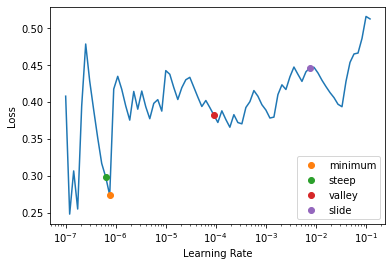

In [29]:
suggested_lrs = show_me_lrs(learn_reg_forward)

In [30]:
learn_reg_forward.freeze_to(-2)
learn_reg_forward.fit_one_cycle(1, suggested_lrs.slide)

epoch,train_loss,valid_loss,_rmse,time
0,0.390998,0.502244,0.708692,05:40


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


Minimum/10:	1.10e-03          
Steepest point:	7.59e-07          
Longest valley:	4.79e-04          
Slide interval:	6.92e-04


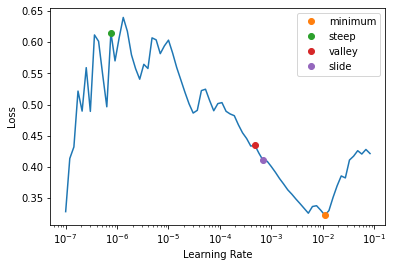

In [31]:
suggested_lrs = show_me_lrs(learn_reg_forward)

In [32]:
learn_reg_forward.freeze_to(-3)
learn_reg_forward.fit_one_cycle(1, suggested_lrs.slide)

epoch,train_loss,valid_loss,_rmse,time
0,0.370118,0.300856,0.548503,07:45


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


Minimum/10:	3.31e-07          
Steepest point:	1.10e-06          
Longest valley:	1.32e-06          
Slide interval:	2.51e-03


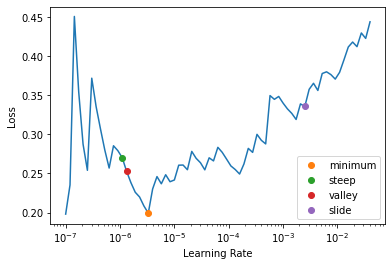

In [33]:
suggested_lrs = show_me_lrs(learn_reg_forward)

In [34]:
learn_reg_forward.unfreeze()
learn_reg_forward.fit_one_cycle(7, suggested_lrs.slide)

epoch,train_loss,valid_loss,_rmse,time
0,0.343786,0.265849,0.515605,09:53
1,0.363140,0.209215,0.457401,09:52
2,0.298449,0.242965,0.492914,09:54
3,0.329941,0.198508,0.445542,09:52
4,0.276000,0.198417,0.445440,09:53
5,0.192007,0.155161,0.393905,09:52
6,0.159548,0.149010,0.386018,09:52


In [35]:
learn_reg_forward.export("./forward_final_model")